<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/blob/main/Applied_Plotting-Charting_and_Data_Representation_in_Python/Week3/Labs/Week3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

# Subplots

In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

plt.subplot?

Signature: plt.subplot(*args, **kwargs) -> 'Axes'
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figu

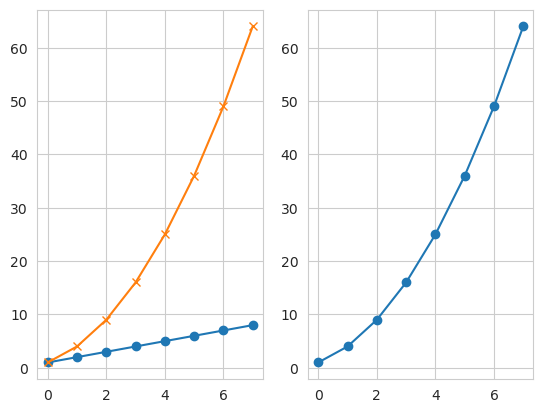

In [2]:
linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
exponential_data = linear_data**2 

plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')
plt.show()

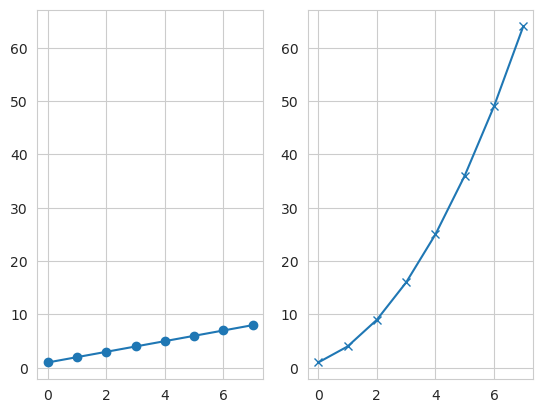

In [3]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')
plt.show()

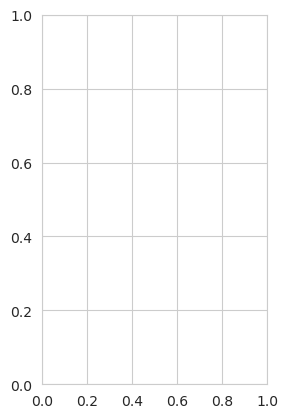

In [4]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1, 2, 1) == plt.subplot(121)
plt.show()

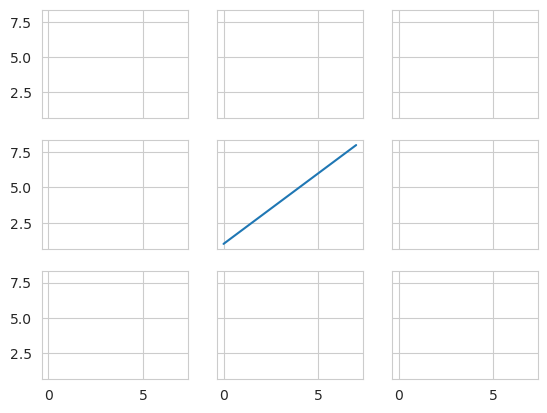

In [5]:
# create a 3x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

# necessary on some systems to update the plot
plt.gcf().canvas.draw()
plt.show()

# Histograms

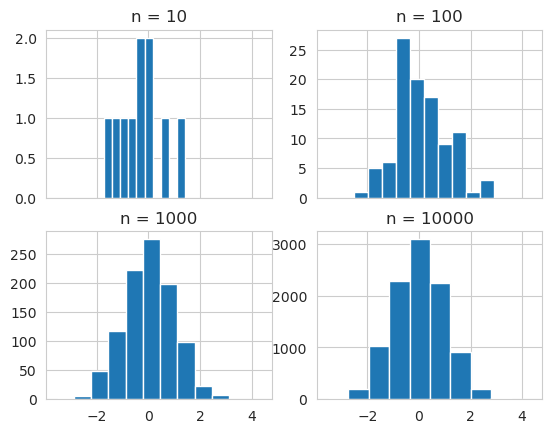

In [6]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0, len(axs)):
    sample_size = 10**(n + 1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n = {}'.format(sample_size))

plt.show()

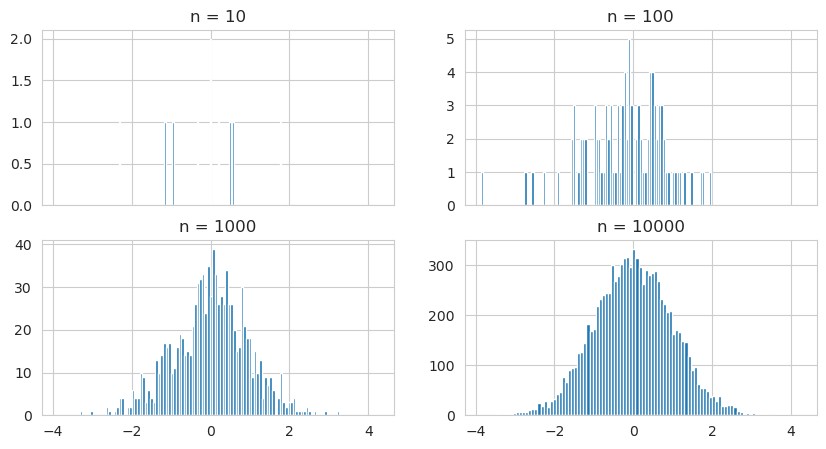

In [7]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n + 1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n = {}'.format(sample_size))

plt.show()

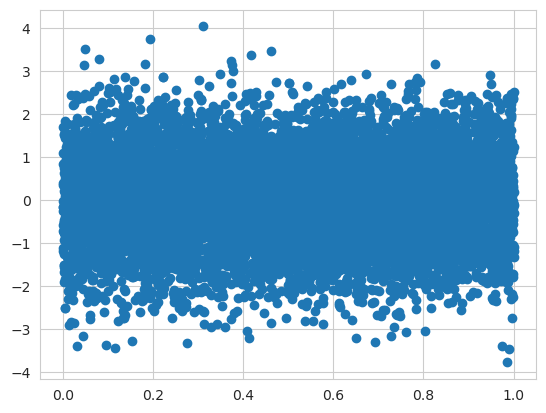

In [8]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)
plt.show()

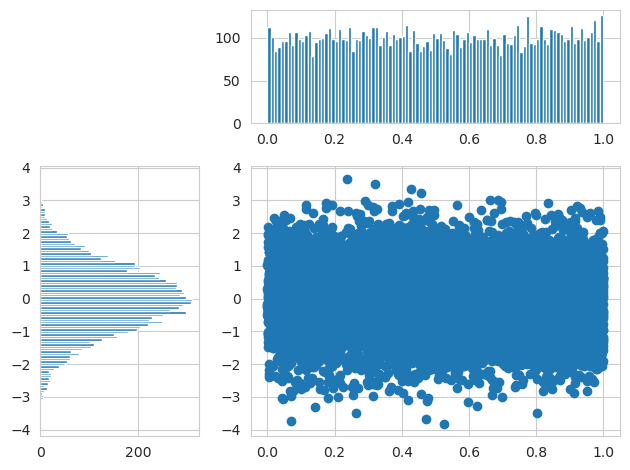

In [9]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

plt.figure()
gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')
plt.tight_layout()
plt.show()

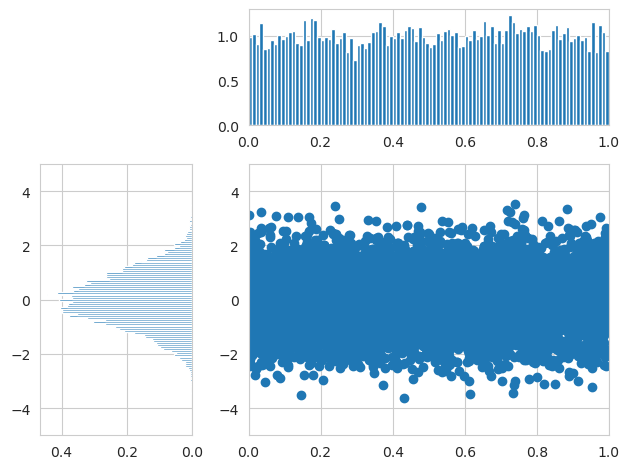

In [10]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

plt.figure()
gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)

# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()

![MOOC DATA](data/moocdata.png "Image")

# Box and Whisker Plots

In [11]:
import pandas as pd

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [12]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.005022,0.499959,1.990225
std,1.004128,0.287572,1.402398
min,-4.829996,0.000051,0.009387
25%,-0.666557,0.252883,0.959272
50%,-0.006198,0.496770,1.656986
75%,0.679028,0.747095,2.694767
max,4.437848,0.999588,11.091103


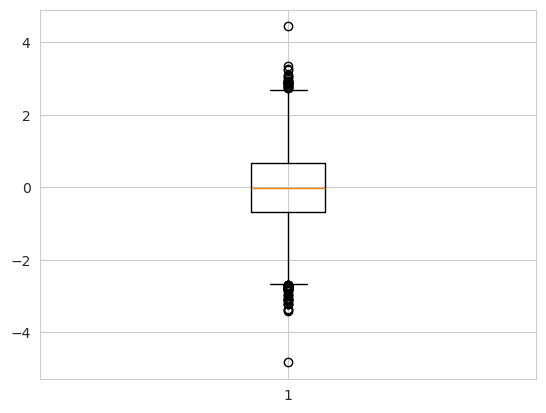

In [13]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'])
plt.show()

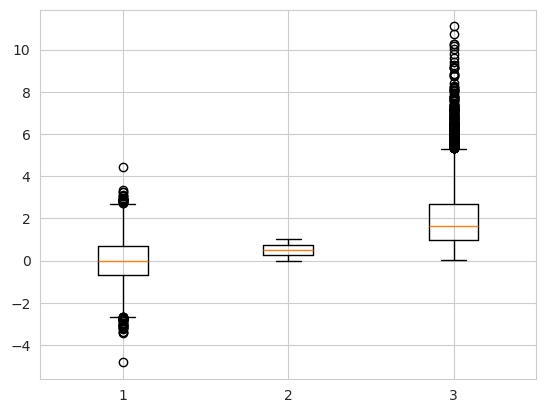

In [14]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])
plt.show()

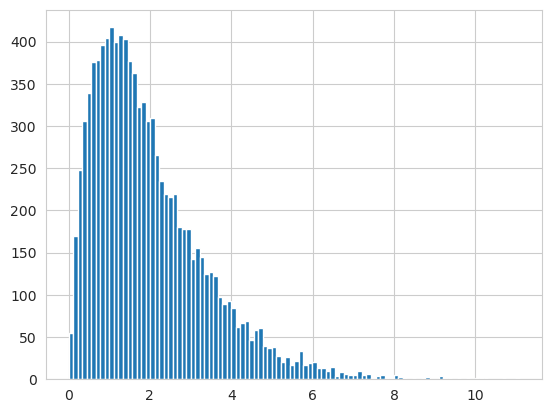

In [15]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)
plt.show()

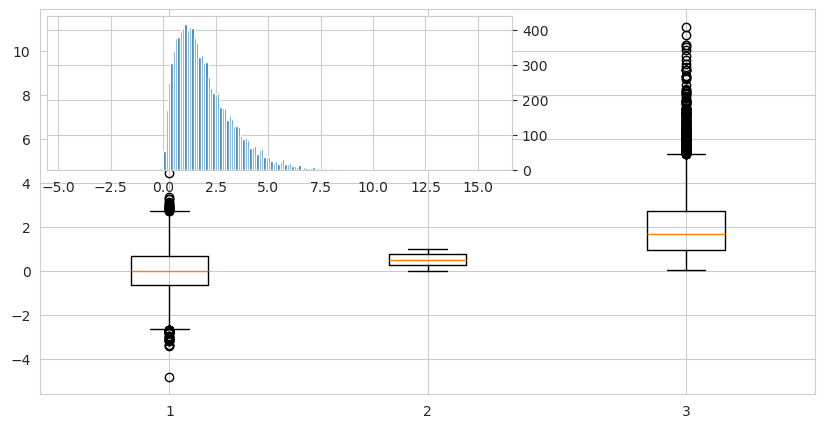

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(10, 5))
plt.boxplot([df['normal'], df['random'], df['gamma']])
# overlay axis on top of another 
ax2 = inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()
plt.show()

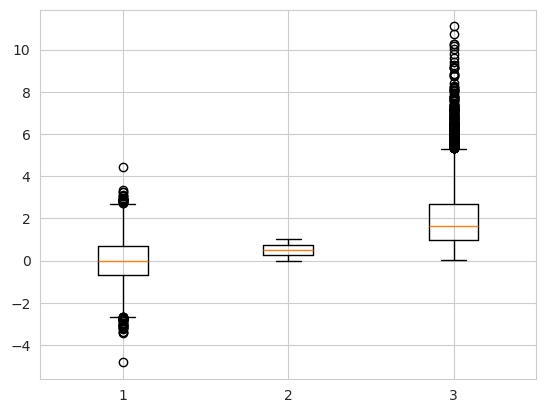

In [17]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])
plt.show()

# Heatmaps

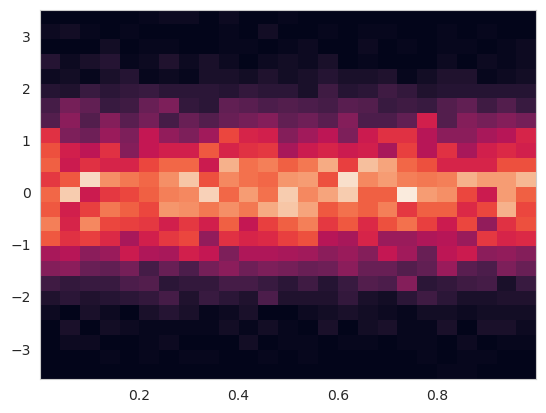

In [18]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

plt.figure()
_ = plt.hist2d(X, Y, bins=25)
plt.show()

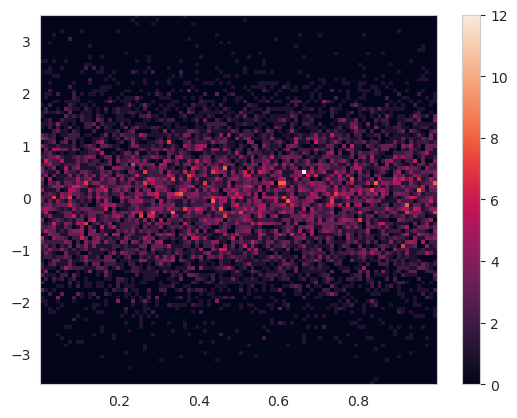

In [19]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
# add a colorbar legend
plt.colorbar()
plt.show()

# Animations

In [20]:
import matplotlib.animation as animation
import functools
%matplotlib widget

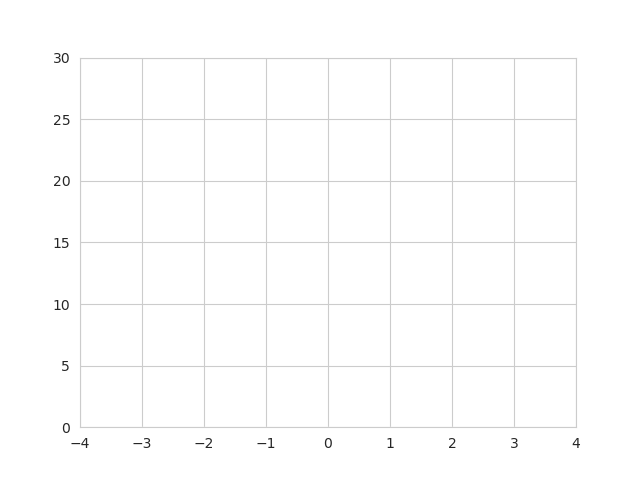

In [25]:
n = 100
bins = np.arange(-4, 4, 0.5)
data = np.random.randn(n)

def animate(frame_number, bar_container):
    hist, _ = np.histogram(data[:frame_number], bins)
    # plt.annotate('n = {}'.format(curr), [3, 27])
    for count, rect in zip(hist, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data[:0], bins)
ax.set_ylim(0, 30)
ax.set_xlim(-4, 4)
anim = functools.partial(animate, bar_container=bar_container)
ani = animation.FuncAnimation(fig, anim, frames=n, interval=50, blit=True)
plt.show()

# Interactivity

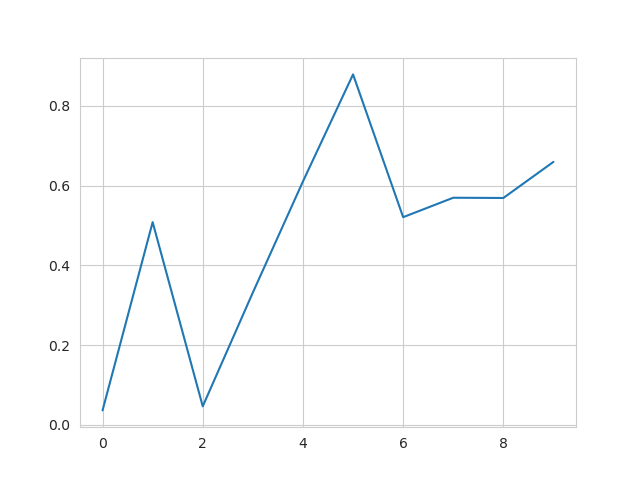

In [22]:
data = np.random.rand(10)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} and data {:.2f}, {:.2f}'.format(event.x, event.y, event.xdata, event.ydata))

plt.figure()
plt.plot(data)
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [23]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)
df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.925913,0.475280,Mexico
1,0.626055,0.097482,UK
2,0.026288,0.509039,Germany
3,0.718767,0.843763,Brazil
4,0.886166,0.560559,USA
5,0.512536,0.592821,China
6,0.078043,0.697023,India
7,0.362696,0.877871,Iraq
8,0.084336,0.418920,Canada
9,0.957470,0.451604,Chile


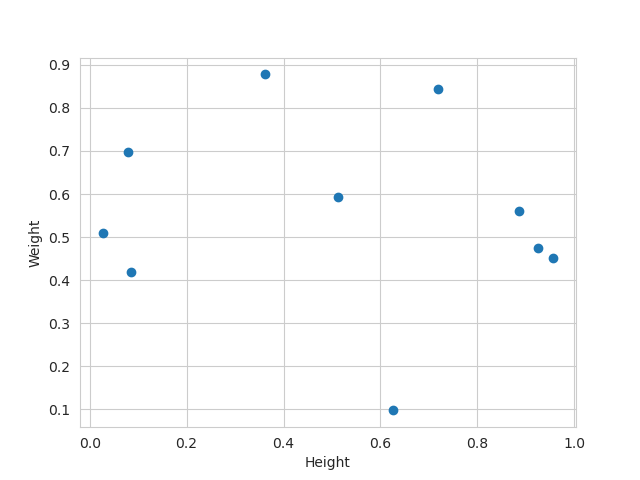

In [24]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')
# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)
plt.show()